In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
import os,sys
import h5py, json
import pickle as pkl
import time

import nept
sys.path.append('../PreProcessing/')
sys.path.append('../TrackingAnalyses/')
sys.path.append('../Lib/')
sys.path.append('../Analyses/')

from importlib import reload  # Python 3.4+ only.
import TrialAnalyses as TA

In [2]:
oakPaths = {}
oakPaths['Root'] = Path('/mnt/o/giocomo/alexg/')
oakPaths['Clustered'] = Path('/mnt/o/giocomo/alexg/Clustered/')
oakPaths['PreProcessed'] = Path('/mnt/o/giocomo/alexg/PreProcessed/')
oakPaths['Raw'] = Path('/mnt/o/giocomo/alexg/RawData/InVivo/')
oakPaths['Analyses'] = Path('/mnt/o/giocomo/alexg/Analyses')

In [52]:
TA=reload(TA)
animal = 'Li'
task = 'T3g'

CT_Path =  oakPaths['Clustered'] / animal / (animal+'_ClusteringSummary.json')
TrialDat_Fn = oakPaths['Analyses'] / animal / ('{}_{}_TrialAnalysesDat.pkl').format(animal,task)

with CT_Path.open() as f:
    CT = json.load(f)

SessionList = []
SessionPaths = {}
TrialDat = {}
cnt=0
if (not TrialDat_Fn.exists())|True:
    for se,v in CT['Sessions'].items():
        if v:
            temp = se.split('_')
            if temp[1]==task:
                try:
                    SessionList.append(se)
                    SessionPaths[se]=TA.ZA.getSessionPaths(oakPaths,se)
                    TrialDat[se]=TA.main(se)
                except:
                    print("Error processing session: {}".format(se))
                    print ("Error", sys.exc_info()[0],sys.exc_info()[1],sys.exc_info()[2].tb_lineno)
                cnt+=1
                
    TrialDat['Sessions'] = SessionList
    TrialDat['SessionPaths'] = SessionPaths
    
    with TrialDat_Fn.open(mode='wb') as f:
        pkl.dump(TrialDat,f,pkl.HIGHEST_PROTOCOL)

else:
    with TrialDat_Fn.open(mode='rb') as f:
        TrialDat = pkl.load(f)
    


Analyzing Trials from session Li_T3g_052818
Loading Beh Tracking Data
Complete.
Loading FRs ...
FR Loaded.
Trial Info Dict does not exists. Computing.
Process Completed. Time 0.23857665061950684s
Trial x Condition Matrix Does Not Exist. Computing.
Process Completed. Time 0.414752721786499s
Trial x Position Long Condition Matrix Does Not Exist. Computing.
Process Completed. Time 0.21788382530212402s
Trial x Position Long FiringRate Matrix Does Not Exist. Computing.
Process Completed Time 0.8519377708435059s
Trial Model Fits Does Not Exists. Computing

Analyzing cell 0

Computing mixedlm with formula: zFR ~ Loc:IO+Loc+IO+Cue+Desc+Co

Overall test R2: 0.037
Full Model Test Set Fit completed. Time = 0.32131338119506836

Analyzing cell 1

Computing mixedlm with formula: zFR ~ Loc:IO+Loc+IO+Cue+Desc+Co

Overall test R2: 0.231
Full Model Test Set Fit completed. Time = 0.17624974250793457
Full Model passed the threshold, looking for optimal submodel.


Fitting Completed for cell 1, total time

In [65]:
TrialDat['Li_T3g_080618'][4]

,ut,FullMod_tR2,modelNum,trainR2,AICc,testR2,Loc:IO,Loc,IO,Cue,Desc,Co
0,cell,0.472875,31.0,0.609697,3177.373975,0.477129,23.064125,32.891772,23.875772,NaN,NaN,NaN
1,cell,0.614634,31.0,0.757777,2759.884998,0.610992,36.132655,24.721000,9.255161,NaN,NaN,NaN
2,mua,0.004512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mua,0.019017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mua,0.052450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
list(CT['Sessions'].keys())

['Li_OF_052818',
 'Li_OF_052918',
 'Li_OF_053018',
 'Li_OF_053118',
 'Li_OF_060118',
 'Li_OF_060418',
 'Li_OF_060518',
 'Li_OF_060718',
 'Li_OF_060818',
 'Li_OF_061118',
 'Li_OF_061218',
 'Li_OF_061318',
 'Li_OF_061418',
 'Li_OF_061518',
 'Li_OF_061818',
 'Li_OF_062018',
 'Li_OF_062518',
 'Li_OF_062618',
 'Li_OF_062718',
 'Li_OF_062818',
 'Li_OF_062918',
 'Li_OF_070218',
 'Li_OF_070618',
 'Li_OF_071018',
 'Li_OF_080118',
 'Li_OF_080218',
 'Li_T3g_052818',
 'Li_T3g_052918',
 'Li_T3g_053018',
 'Li_T3g_053118',
 'Li_T3g_060118',
 'Li_T3g_060418',
 'Li_T3g_061318',
 'Li_T3g_061518',
 'Li_T3g_061818',
 'Li_T3g_062018',
 'Li_T3g_062518',
 'Li_T3g_062618',
 'Li_T3g_062718',
 'Li_T3g_062818',
 'Li_T3g_070218',
 'Li_T3g_070518',
 'Li_T3g_070618',
 'Li_T3g_070918',
 'Li_T3g_071018',
 'Li_T3g_071118',
 'Li_T3g_072518',
 'Li_T3g_072618',
 'Li_T3g_073018',
 'Li_T3g_080118',
 'Li_T3g_080218',
 'Li_T3g_080318',
 'Li_T3g_080618',
 'Li_T3g_080718',
 'Li_T3i_060518',
 'Li_T3i_060618',
 'Li_T3i_060818',


In [79]:
modelFits = pd.DataFrame()
for se in TrialDat['Sessions']:
    d = TrialDat[se][4]
    if len(d)>0:
        nUnits = d.shape[0]
        d['se'] = [se]*nUnits
        modelFits = pd.concat([modelFits,d])

In [129]:
mods = {}
for k,pp in params.items():
    s =''
    for p in pp:
        s+='-'+p
    mods[k]=s
selModels = []
params = TA.getParamSet()
for u in modelFits['modelNum']:
    if u>-1:
        selModels.append(mods[int(u)])
    else:
        selModels.append('UnCla')

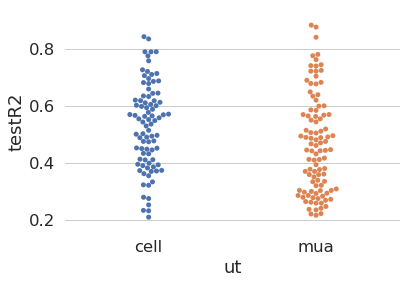

In [91]:
sns.swarmplot(y='testR2',x='ut',data=modelFits)

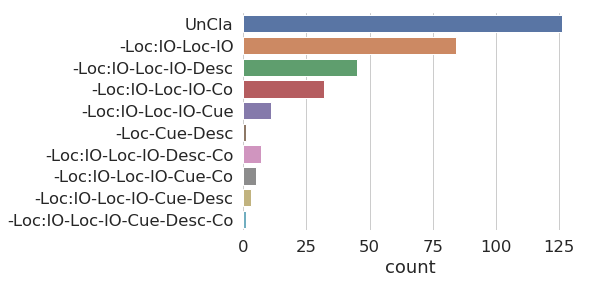

In [130]:
sns.countplot(y=selModels)

In [133]:
nCells = modelFits.shape[0]
pd.Series(selModels).value_counts()/nCells

UnCla                         0.400000
-Loc:IO-Loc-IO                0.266667
-Loc:IO-Loc-IO-Desc           0.142857
-Loc:IO-Loc-IO-Co             0.101587
-Loc:IO-Loc-IO-Cue            0.034921
-Loc:IO-Loc-IO-Desc-Co        0.022222
-Loc:IO-Loc-IO-Cue-Co         0.015873
-Loc:IO-Loc-IO-Cue-Desc       0.009524
-Loc:IO-Loc-IO-Cue-Desc-Co    0.003175
-Loc-Cue-Desc                 0.003175
dtype: float64

In [134]:
modelFits['selMod'] = selModels

In [140]:
import statsmodels.formula.api as smf
dat =[]
dat = modelFits[~modelFits['modelNum'].isnull()]
md =smf.mixedlm('testR2~ut+selMod',data=dat,groups=dat['se'])
mdf = md.fit()
mdf.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Mixed Linear Model Regression Results
===============================================================================
Model:                      MixedLM         Dependent Variable:         testR2 
No. Observations:           189             Method:                     REML   
No. Groups:                 19              Scale:                      0.0220 
Min. group size:            2               Likelihood:                 67.3213
Max. group size:            19              Converged:                  Yes    
Mean group size:            9.9                                                
-------------------------------------------------------------------------------
                                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------------
Intercept                             0.325    0.155  2.090 0.037  0.020  0.629
ut[T.mua]                            -0.049    0.023 -2.131 0.033 -0.093 -0.004
selMod[T.-Loc:IO-Loc-IO]              0.168    0.154  1.090 0.276 -0.134  0.470
selMod[T.-Loc:IO-Loc-IO-Co]           0.158    0.156  1.012 0.311 -0.148  0.464
selMod[T.-Loc:IO-Loc-IO-Cue]          0.231    0.160  1.449 0.147 -0.082  0.544
selMod[T.-Loc:IO-Loc-IO-Cue-Co]       0.296    0.170  1.743 0.081 -0.037  0.629
selMod[T.-Loc:IO-Loc-IO-Cue-Desc]     0.198    0.178  1.111 0.267 -0.152  0.548
selMod[T.-Loc:IO-Loc-IO-Cue-Desc-Co]  0.299    0.218  1.368 0.171 -0.129  0.727
selMod[T.-Loc:IO-Loc-IO-Desc]         0.238    0.155  1.536 0.125 -0.066  0.542
selMod[T.-Loc:IO-Loc-IO-Desc-Co]      0.239    0.165  1.447 0.148 -0.085  0.562
Group Var                             0.004    0.018                           
===============================================================================

"""

In [141]:
mdf.wald_test_terms()

<class 'statsmodels.stats.contrast.WaldTestResults'>
                chi2                P>chi2  df constraint
Intercept   4.366554    0.0366510490936313              1
ut          4.541171  0.033088946257094236              1
selMod     13.363287   0.09994635063920326              8